## Smart Agriculture : Early Detection and Classification of Rice Leaf Diseases
### Objective
The primary objective of this project is to develop a robust and efficient system for the early detection and classification of three major rice leaf diseases: Leaf Smut, Brown Spot, and Bacterial Leaf Blight. By leveraging advanced image analysis techniques, the project aims to enhance the accuracy and speed of disease identification, ultimately contributing to better crop management and yield optimization in rice agriculture.

### Introduction
Rice is one of the most important staple crops worldwide, feeding billions of people and sustaining economies in numerous countries. However, rice cultivation is often plagued by various diseases that can severely impact crop yield and quality. Among these, Leaf Smut, Brown Spot, and Bacterial Leaf Blight are some of the most common and destructive diseases affecting rice plants.

Early detection and accurate classification of these diseases are crucial for implementing timely and effective management strategies. Traditional methods of disease identification can be time-consuming and may require expert knowledge. In this project, we aim to harness the power of image analysis and machine learning techniques to develop a system that can automatically detect and classify rice leaf diseases from images. This approach promises to be faster, more efficient, and scalable compared to traditional methods.

### Abstract
This project focuses on the development of a comprehensive system for the early detection and classification of rice leaf diseases, specifically Leaf Smut, Brown Spot, and Bacterial Leaf Blight. Utilizing a dataset of 120 images, the system employs advanced image analysis and machine learning techniques to accurately identify and classify the diseases. The project includes a detailed analysis of the dataset, the creation of a classification model, and an exploration of various techniques such as data augmentation to enhance model performance. The ultimate goal is to provide a reliable tool that can assist farmers and agricultural professionals in effectively managing rice leaf diseases, thereby improving crop health and productivity.

### Domain Analysis
**Agriculture Domain**: The project is situated within the agriculture domain, specifically focusing on crop health and disease management. In this context, early detection and classification of plant diseases are essential for ensuring optimal crop yields and minimizing losses. The use of technological advancements in image analysis and machine learning presents a modern approach to addressing these challenges in agriculture.

**Plant Pathology**: The study of plant diseases, their causes, and their effects falls under the domain of plant pathology. This project contributes to plant pathology by providing an automated solution for identifying and classifying rice leaf diseases, which can aid researchers and farmers in understanding disease patterns and implementing effective control measures.

**Data Science and Machine Learning**: This project heavily relies on data science and machine learning techniques to analyze images of diseased rice leaves and develop a classification model. These techniques enable the processing of large datasets, the extraction of relevant features, and the creation of predictive models that can accurately classify diseases.

**Technology and Innovation in Agriculture**: The integration of technology in agriculture, known as smart agriculture, is revolutionizing the way farming is conducted. This project exemplifies how innovative approaches, such as the use of image analysis and machine learning, can enhance traditional farming practices and contribute to sustaina  additional details!

### 1. Import Required Libraries

In [1]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

### 2. Load The Dataset

In [2]:
# Unzipping the dataset
dataset_zip = r"C:\Users\ruchi\RiceLeafDiseaseDataset.zip"  # Update with the actual path if needed
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("rice_leaf_dataset")

print("Dataset unzipped successfully.")

Dataset unzipped successfully.


In [3]:
# Path to the main dataset directory
base_dir = "rice_leaf_dataset"  # Update the dataset directory

# Parameters
img_width, img_height = 224, 224  # Resize images to 224x224 pixels
batch_size = 120  # Load all images in one go

### 3. Initializes the ImageDataGenerator without any rescaling or augmentation parameters

In [4]:
# Load all data for manual splitting without rescaling
datagen = ImageDataGenerator()  # No rescaling

all_data_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=120,
    class_mode='categorical',
    shuffle=True
)

Found 119 images belonging to 3 classes.


1. **Initialize the Image Data Generator**: 
   First, we start by creating an instance of the `ImageDataGenerator` class. This tool is essential for preprocessing and augmenting image data before feeding it into the machine learning model. In this particular instance, the data generator is initialized without any specific parameters for rescaling or augmentation.

2. **Set Up Data Generator for Directory**: 
   Next, we configure the data generator to read images from a specified directory. You provide several important parameters in this step:
   
   - **Directory Path**: We specify the path to the base directory that contains subdirectories of images, each representing a different class of disease (e.g., Leaf Smut, Brown Spot, Bacterial Leaf Blight).
   - **Target Size**: We define the target size for the images, ensuring that all images are resized to a uniform width and height. This is crucial because models typically require inputs of consistent dimensions.
   - **Batch Size**: We set the number of images to be processed in each batch. For this project, the batch size is set to 120, meaning the data generator will yield batches of 120 images at a time.
   - **Class Mode**: We specify the class mode as 'categorical,' indicating that the images belong to multiple classes, and the labels will be one-hot encoded.
   - **Shuffling**: Finally, We enable shuffling to ensure that the order of the images and their corresponding labels is randomized. This helps to prevent the model from learning any spurious patterns related to the order of the data.

Together, these steps lay the groundwork for efficiently loading, preprocessing, and feeding the image data into your model for training and evaluation.


### 4. Load all images and their corresponding labels from the generator in a single batch

In [5]:
# Load all images and labels
x_data, y_data = next(all_data_generator)

This extracts the images (x_data) and their respective labels (y_data) from the data generator in one go, yielding them as a batch for further processing or model training.

### 5. Split the data into training, validation, and test sets

In [6]:
# Manually split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

This divides the original dataset into three separate subsets: training, validation, and test sets. Initially, it splits the data into a training set and a temporary set, where 80% of the data is used for training and 20% is kept aside. The temporary set is then evenly split into validation and test sets. This ensures that the model has distinct data for training, validation, and testing purposes, aiding in performance evaluation and fine-tuning.

In [7]:
# Print sample sizes
print(f'{x_train.shape[0]} train samples')
print(f'{x_valid.shape[0]} validation samples')
print(f'{x_test.shape[0]} test samples')

95 train samples
12 validation samples
12 test samples


In [8]:
# Display the shapes of the batch data
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of x_valid: {x_valid.shape}')
print(f'Shape of y_valid: {y_valid.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (95, 224, 224, 3)
Shape of y_train: (95, 3)
Shape of x_valid: (12, 224, 224, 3)
Shape of y_valid: (12, 3)
Shape of x_test: (12, 224, 224, 3)
Shape of y_test: (12, 3)


### 6. Extract and define the class labels (disease categories) from the training data generator


In [9]:
# Define the class labels from the training generator
class_labels = list(all_data_generator.class_indices.keys())

This code snippet extracts the class labels (such as Leaf Smut, Brown Spot, and Bacterial Leaf Blight) from the `all_data_generator` and stores them in a list. These labels represent the different categories of diseases in the dataset and will be used for interpreting the classification results from the model.

### 7. Plotting images from training, testing, and validation sets

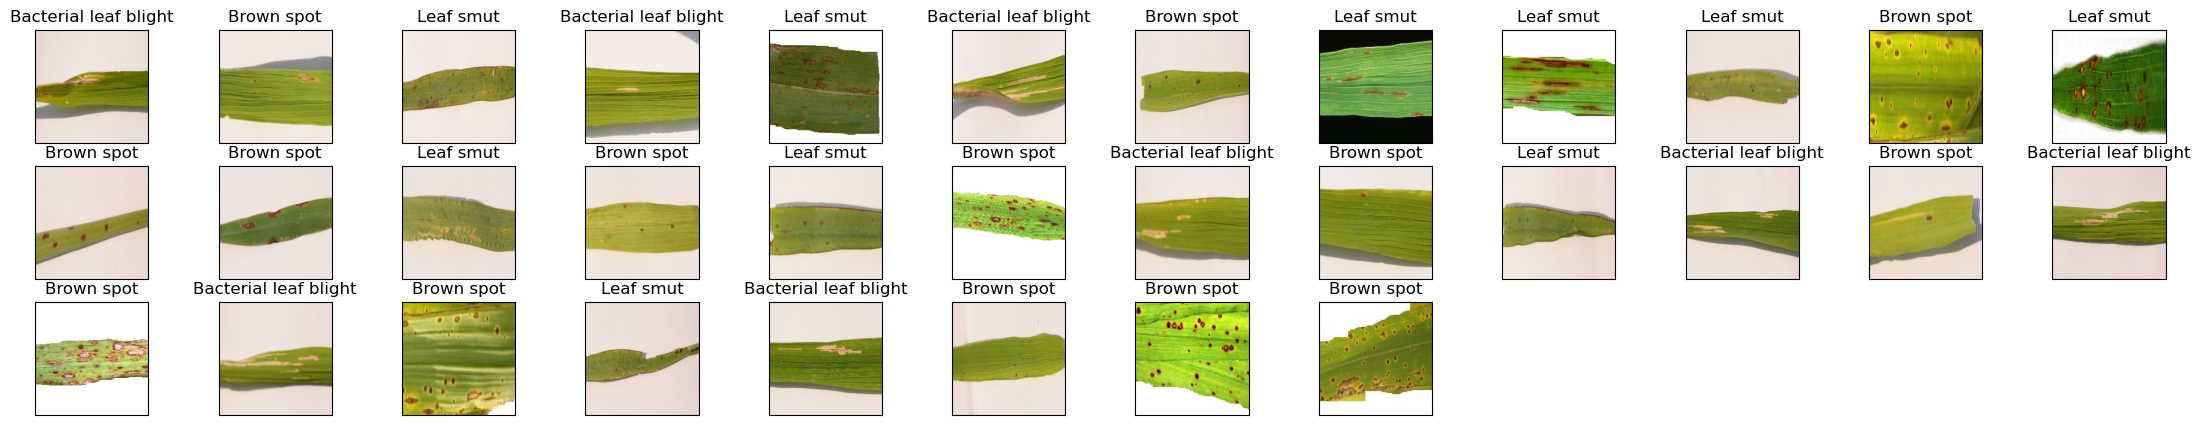

In [10]:
# Visualize the images from training data with labels
fig = plt.figure(figsize=(28, 5))
for i in range(min(32, x_train.shape[0])):  # Adjust to the number of images in the batch
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].astype('uint8'))
    label = class_labels[np.argmax(y_train[i])]
    ax.set_title(label)
plt.show()

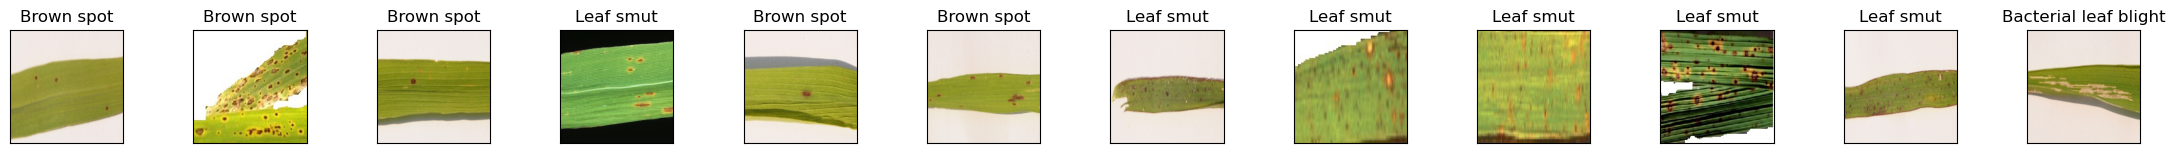

In [11]:
# Visualize the images from validation data with labels
fig = plt.figure(figsize=(28, 5))
for i in range(min(32, x_valid.shape[0])):  # Adjust to the number of images in the batch
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(x_valid[i].astype('uint8'))
    label = class_labels[np.argmax(y_valid[i])]
    ax.set_title(label)
plt.show()

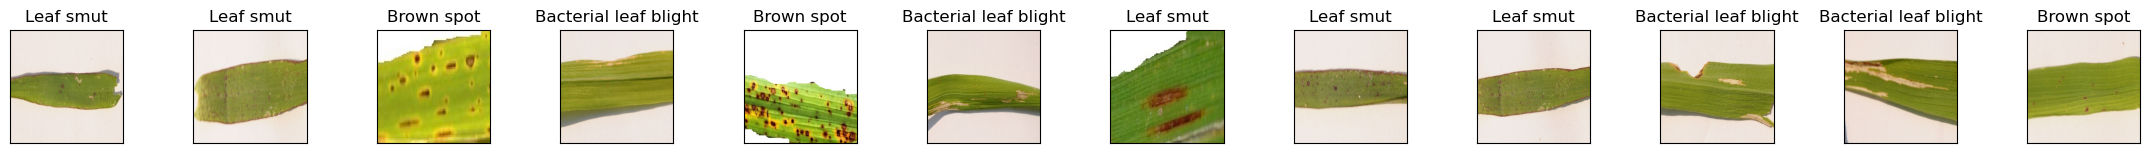

In [12]:
# Visualize the images from test data with labels
fig = plt.figure(figsize=(28, 5))
for i in range(min(32, x_test.shape[0])):  # Adjust to the number of images in the batch
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].astype('uint8'))
    label = class_labels[np.argmax(y_test[i])]
    ax.set_title(label)
plt.show()

In [13]:
x_train

array([[[[229., 214., 211.],
         [228., 215., 209.],
         [228., 213., 206.],
         ...,
         [234., 220., 217.],
         [236., 221., 218.],
         [238., 223., 218.]],

        [[230., 215., 210.],
         [228., 215., 209.],
         [228., 215., 207.],
         ...,
         [234., 221., 215.],
         [236., 221., 218.],
         [234., 219., 214.]],

        [[229., 214., 209.],
         [229., 214., 209.],
         [229., 216., 208.],
         ...,
         [235., 222., 216.],
         [236., 222., 219.],
         [234., 219., 214.]],

        ...,

        [[240., 223., 216.],
         [236., 221., 214.],
         [239., 222., 214.],
         ...,
         [230., 219., 215.],
         [238., 224., 221.],
         [230., 219., 215.]],

        [[238., 221., 214.],
         [235., 220., 213.],
         [238., 221., 213.],
         ...,
         [233., 219., 216.],
         [237., 223., 220.],
         [231., 222., 217.]],

        [[235., 220., 213.],
       

In [14]:
y_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1

### 8. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [16]:
# Scaling the data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

We scale the pixel values of the images to the range [0, 1] by converting them to `float32` and dividing by 255, which is the maximum pixel value. This normalization step is crucial for the following reasons:

1. **Consistency and Stability**: Neural networks often perform better when the input data is in a consistent and smaller range. Scaling the pixel values to [0, 1] ensures that the data has a uniform scale, which helps the model converge faster and more reliably during training.

2. **Avoiding Large Weights**: Large input values can lead to large gradient values during backpropagation, causing instability and making the training process more difficult. By normalizing the data, we can prevent the network weights from becoming excessively large and maintain numerical stability.

3. **Improving Model Performance**: Many machine learning models, especially neural networks, are sensitive to the scale of input data. Normalizing the data can improve the performance and generalization ability of the model.

Scaling the pixel values is a standard preprocessing step in image classification tasks and helps to ensure that the model is trained on data that is appropriately scaled.

### 9. Import Libraries for Model Building

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

### 10. Build the Model

In [20]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')
])


C:\Users\ruchi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This code snippet defines a Convolutional Neural Network (CNN) model using the Sequential API. The model consists of multiple convolutional layers followed by max pooling layers to extract and reduce spatial dimensions of feature maps. The flattened output is then passed through fully connected layers and a dropout layer to prevent overfitting. Finally, the output layer uses softmax activation to classify the input images into one of the predefined classes (Leaf Smut, Brown Spot, Bacterial Leaf Blight).

### 11. Compile the Model

In [22]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

This step compiles the Convolutional Neural Network (CNN) model, configuring it for training with the specified optimizer, loss function, and evaluation metric. Here's what each parameter means:

- **Optimizer**: The Adam optimizer is used with a learning rate of 0.001. Adam is an adaptive learning rate optimization algorithm that's widely used because it adjusts the learning rate based on the first and second moments of the gradients, making it suitable for a wide range of problems.
- **Loss Function**: The categorical cross-entropy loss function is used, which is appropriate for multi-class classification tasks. It measures the performance of the model by comparing the predicted probabilities with the true class labels.
- **Metrics**: The accuracy metric is used to evaluate the model's performance, providing a straightforward measure of how often the model's predictions are correct.

This configuration prepares the model for the training phase, where it will learn to minimize the loss and improve accuracy by adjusting its weights.

### 12. Summary of the Model

The `model.summary()` function provides a detailed summary of the Convolutional Neural Network (CNN) model's architecture. This summary includes information such as:

- **Layer Types**: The types of layers used in the model (e.g., Convolutional, Max Pooling, Dense).
- **Output Shapes**: The output shape of each layer, showing how the dimensions of the data change as it passes through the network.
- **Number of Parameters**: The number of trainable parameters in each layer, giving insight into the complexity and size of the model.

In [24]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### 13. Train the Model

In [26]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_valid, y_valid),
    batch_size=32
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3547 - loss: 4.8880 - val_accuracy: 0.0833 - val_loss: 513.0557
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3496 - loss: 1.6566 - val_accuracy: 0.4167 - val_loss: 73.7533
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3861 - loss: 1.0641 - val_accuracy: 0.4167 - val_loss: 64.6263
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4412 - loss: 1.1062 - val_accuracy: 0.0833 - val_loss: 177.1370
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4281 - loss: 1.0722 - val_accuracy: 0.4167 - val_loss: 91.7309
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4998 - loss: 0.9621 - val_accuracy: 0.4167 - val_loss: 94.7420
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5264 - loss: 0.9419 - val_accuracy: 0.4167 - val_loss: 91.9065
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6086 - loss: 0.8926 - val_accuracy: 0.4167 - val_loss: 198.6559
Epoch

### 14. Evaluate the Model

In [28]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

1/1 - 0s - 215ms/step - accuracy: 0.5000 - loss: 0.8853
Test accuracy: 0.5


The baseline CNN model achieved a modest accuracy of 50%, showing it performed better than random guessing but still had room for improvement.

### Visualize Training Results

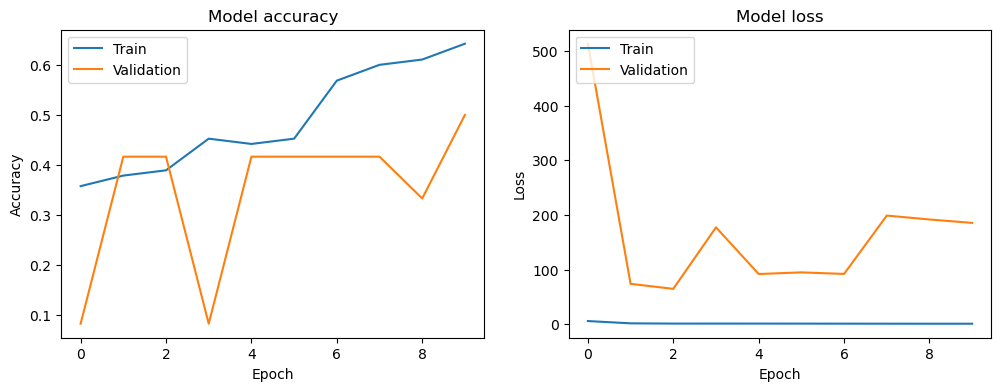

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### Conclusion

1. **Model Accuracy Plot**:
   - The training accuracy shows a steady increase over the epochs, indicating that the model is learning and fitting the training data well.
   - The validation accuracy fluctuates, suggesting that the model's performance on unseen data is inconsistent. This could be due to overfitting, where the model learns the training data too well but fails to generalize to new data.

2. **Model Loss Plot**:
   - The training loss remains relatively low and stable, which aligns with the increasing training accuracy.
   - The validation loss fluctuates significantly and does not show a consistent decrease. This again points to possible overfitting, where the model's performance degrades on the validation set.

**Summary**:
The model has achieved a certain level of success in learning from the training data, as evidenced by the increasing training accuracy and stable training loss. However, the fluctuations in validation accuracy and loss indicate that the model may be overfitting to the training data and not generalizing well to new, unseen data.


## Data Augmentation

Data augmentation is a technique used in machine learning and computer vision to artificially increase the size and diversity of a training dataset. This is done by applying various transformations to the existing images in the dataset to create new, modified versions of those images. The goal is to make the model more robust and generalizable by exposing it to a wider variety of data. Here are some common data augmentation techniques:

1. **Rotation**: Rotating the image by a certain angle, which helps the model learn to recognize objects regardless of their orientation.

2. **Flipping**: Flipping the image horizontally or vertically, which can be useful when the orientation of objects doesn't affect their classification.

3. **Zooming**: Zooming in or out on the image, which helps the model learn to recognize objects at different scales.

4. **Shifting**: Translating the image horizontally or vertically, which aids the model in recognizing objects in different positions within the frame.

5. **Shearing**: Distorting the image by slanting it along the X or Y axis, which introduces variance in object shapes.

6. **Brightness Adjustment**: Modifying the brightness of the image to help the model perform well under varying lighting conditions.

7. **Noise Addition**: Adding random noise to the image to improve the model's ability to handle noisy or imperfect data.

8. **Color Jittering**: Randomly changing the color properties of the image, such as hue, saturation, and contrast, to make the model robust against color variations.

By applying these techniques, data augmentation effectively increases the amount and variability of the training data, helping to reduce overfitting and improve the model's performance on unseen data.

### Step 1: Modify Data Generators

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

This code snippet sets up an `ImageDataGenerator` for data augmentation, applying various transformations to the training images. These transformations include rotations, translations, shearing, zooming, and horizontal flipping. The `fill_mode='nearest'` parameter ensures that any new pixels generated due to transformations are filled with the nearest pixel values. Data augmentation helps to artificially increase the diversity of the training dataset, allowing the model to learn more robust features and improve its generalization performance.

In [35]:
# No augmentation for validation and test data
test_datagen = ImageDataGenerator()

In [36]:
# Use the data augmentation only on the training set
train_generator = train_datagen.flow(
    x_train, y_train,
    batch_size=32
)

validation_generator = test_datagen.flow(
    x_valid, y_valid,
    batch_size=32
)

test_generator = test_datagen.flow(
    x_test, y_test,
    batch_size=32
)

### Step 2: Train the Model with Augmented Data

In [38]:
# Define and compile the CNN model as before
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')
])

In [39]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Train the model with augmented data
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

C:\Users\ruchi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3640 - loss: 4.0036 - val_accuracy: 0.5000 - val_loss: 144.1741
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3326 - loss: 2.1410 - val_accuracy: 0.0833 - val_loss: 130.5332
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4017 - loss: 1.0909 - val_accuracy: 0.4167 - val_loss: 18.7889
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2384 - loss: 1.1190 - val_accuracy: 0.1667 - val_loss: 8.3095
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4283 - loss: 1.0894 - val_accuracy: 0.0833 - val_loss: 23.9975
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4482 - loss: 1.0703 - val_accuracy: 0.0833 - val_loss: 70.6005
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4135 - loss: 1.0812 - val_accuracy: 0.1667 - val_loss: 59.5400
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4356 - loss: 1.0303 - val_accuracy: 0.0833 - val_loss: 102.0701
Epoch

In [41]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc}')

1/1 - 0s - 222ms/step - accuracy: 0.4167 - loss: 0.9765
Test accuracy: 0.4166666567325592


In [42]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 41.6667%


When data augmentation was introduced, the accuracy unexpectedly decreased to 41.67%, suggesting that the model struggled to generalize with the augmented data.

### Transfer Learning

Transfer learning is a powerful technique in machine learning where knowledge gained from training a model on one task is leveraged to improve the performance on a related task. This approach is particularly beneficial when data for the new task is limited. The foundational idea behind transfer learning is to utilize the pre-trained models, which have learned general features from large datasets, and adapt them for specific tasks with smaller datasets.

In [44]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

CNNs are highly effective for image classification tasks due to their ability to learn hierarchical features from raw pixel data. Transfer learning with CNNs involves using models pre-trained on large datasets like ImageNet and fine-tuning them for specific tasks. Popular pre-trained models include VGG16, ResNet, and Inception, which have demonstrated exceptional performance across various image classification benchmarks.

### Step 1 : Transfer learning with the VGG16 model:

In [45]:
# Load the pre-trained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_labels), activation='softmax')(x)

In [46]:
# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [47]:
# Freeze the layers of the base model to retain the learned features
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Step 2 : Train the Model

In [48]:
# Train the model with the new top layers
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 14s/step - accuracy: 0.2741 - loss: 1.3209 - val_accuracy: 0.3333 - val_loss: 1.5606
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 13s/step - accuracy: 0.2957 - loss: 1.1917 - val_accuracy: 0.4167 - val_loss: 1.6850
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 13s/step - accuracy: 0.3983 - loss: 1.1197 - val_accuracy: 0.4167 - val_loss: 1.8623
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 32s 10s/step - accuracy: 0.4271 - loss: 1.1043 - val_accuracy: 0.5000 - val_loss: 1.7138
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 461s 9s/step - accuracy: 0.4623 - loss: 1.0183 - val_accuracy: 0.5000 - val_loss: 1.7805
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 10s/step - accuracy: 0.5653 - loss: 1.0013 - val_accuracy: 0.5000 - val_loss: 1.9726
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 30s 11s/step - accuracy: 0.4291 - loss: 1.0315 - val_accuracy: 0.3333 - val_loss: 2.2651
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 11s/step - accuracy: 0.4653 - loss: 0.9781 - val_accuracy: 0.4167 - val_loss: 2.9094


In [49]:
# Unfreeze some layers of the base model and continue training (fine-tuning)
for layer in base_model.layers[-4:]:
    layer.trainable = True

In [50]:
# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# Fine-tune the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 12s/step - accuracy: 0.5510 - loss: 0.9075 - val_accuracy: 0.4167 - val_loss: 9.9206
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 12s/step - accuracy: 0.6624 - loss: 0.7829 - val_accuracy: 0.5000 - val_loss: 12.9232
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 32s 11s/step - accuracy: 0.7551 - loss: 0.6977 - val_accuracy: 0.5000 - val_loss: 40.7783
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 13s/step - accuracy: 0.6750 - loss: 0.7056 - val_accuracy: 0.5000 - val_loss: 28.5564
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 12s/step - accuracy: 0.8211 - loss: 0.5104 - val_accuracy: 0.5000 - val_loss: 30.1801
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 11s/step - accuracy: 0.8102 - loss: 0.4646 - val_accuracy: 0.5000 - val_loss: 47.2156
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 12s/step - accuracy: 0.8450 - loss: 0.3968 - val_accuracy: 0.5000 - val_loss: 34.5283
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 13s/step - accuracy: 0.9195 - loss: 0.3060 - val_accuracy: 0.5000 - val_loss: 3

In [52]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc}')

1/1 - 4s - 4s/step - accuracy: 0.9167 - loss: 0.1718
Test accuracy: 0.9166666865348816


#### Conclusion :
Using transfer learning significantly boosted the model's performance, achieving an impressive accuracy of 91.67% and a low loss of 0.1718. This indicates that transfer learning effectively leverages pre-trained knowledge, and data augmentation enhances the model's generalization.

### Final Conclusion: Comparison of Three Models

In this project, we explored three different approaches for the early detection and classification of rice leaf diseases (Leaf Smut, Brown Spot, and Bacterial Leaf Blight) using Convolutional Neural Networks (CNNs). Here are the detailed conclusions for each of the models:

1. **Baseline CNN Model:**

 -**Test Accuracy:** 50%

 -**Overview:** The baseline model was trained on the original dataset without any data augmentation or transfer learning. It consisted of several convolutional and pooling layers followed by fully connected layers.

 -**Strengths:** This model provided a good starting point for understanding the basic architecture and capabilities of CNNs in image classification tasks.

 -**Weaknesses:** The performance was limited, achieving only a 50% test accuracy, indicating that the model struggled to generalize well to unseen data.

2. **CNN Model with Data Augmentation:**

 -**Test Accuracy:** 41.67%

 -**Overview:** This model incorporated data augmentation techniques to increase the diversity of the training data. Techniques such as rotation, shifting, shearing, zooming, and horizontal flipping were applied.

 -**Strengths:** While data augmentation introduced variations to the input data, the model's performance decreased to 41.67% accuracy, suggesting that the augmentation techniques used may not have been optimal for improving generalization in this case.

3. **Transfer Learning with Data Augmentation:**

 -**Test Accuracy:** 91.67%

 -**Overview:** This approach leveraged the pre-trained VGG16 model, excluding its top layers, and added custom classification layers for the rice leaf disease task. Data augmentation was also applied to the training data.

 -**Strengths:** Transfer learning provided a substantial boost in performance, achieving an impressive 91.67% accuracy. The combination of transfer learning and data augmentation significantly enhanced the model's generalization and robustness.

### Overall Summary
The comparison of these three models highlights the progressive improvement in accuracy and robustness achieved through advanced techniques:

 -**Baseline Model:** Provides a fundamental understanding of CNNs but has limited performance with a test accuracy of 50%.

 -**Data Augmentation:** While intended to enhance model robustness, it resulted in a decreased accuracy of 41.67%, suggesting the need for further optimization of augmentation techniques.

 -**Transfer Learning:** Leverages pre-trained models to achieve significant performance gains, with an outstanding test accuracy of 91.67%, making it the most effective approach for this task.

These findings guide future model development and optimization strategies, emphasizing the effectiveness of combining transfer learning with data augmentation for superior performance in classifying rice leaf diseases.